# NutritioList Insight

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization functions
import pcavis as vs

# Display for notebooks
%matplotlib inline

In [6]:
# Load the data
try:
    data_small = pd.read_csv("data_cluster_Ni_noNan_small.csv")
    #data_RDA = pd.read_csv("RDA_micros.csv")
    print("Nutrition dataset has {} samples with {} features each.".format(*data_small.shape))
except:
    print("Data could not be loaded. Is the file missing?")

Nutrition dataset has 998 samples with 25 features each.


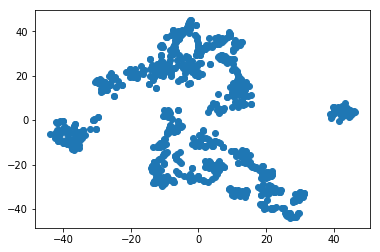

In [34]:
data_nuts = data_small.drop(['NDB_No', 'Cluster', 'Ni', 'Shrt_Desc', 'GmWt_Desc1'], axis = 1)
from sklearn.manifold import TSNE
X3 = TSNE(n_components = 2).fit_transform(data_nuts)
#X3.shape
# Plotting the new dimensions/ components  
A3 = X3[:data_nuts.shape[0], :]
B3 = X3[data_nuts.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])
X3 = pd.DataFrame(X3)
reduced_data = X3

### Visualize Feature Distributions

In [ ]:
type(X3)

## Clustering


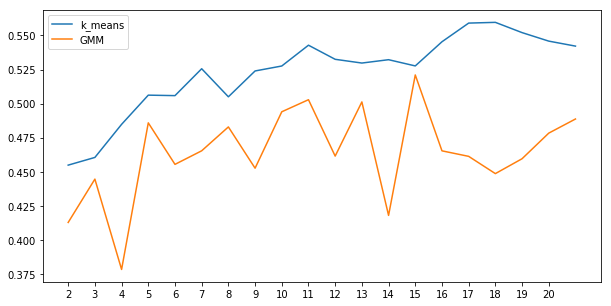

In [35]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def clustering_errors_kmeans(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions_kmeans = kmeans.predict(data)
    silhouette_avg_kmeans = silhouette_score(data, predictions_kmeans)
    return silhouette_avg_kmeans

def clustering_errors_GMM(k, data):
    GMM = GaussianMixture(n_components=k).fit(data)
    predictions_GMM = GMM.predict(data)
    silhouette_avg_GMM = silhouette_score(data, predictions_GMM)
    return silhouette_avg_GMM

# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, 22, 1)

# Calculate error values for all k values we're interested in
errors_per_k_kmeans = [clustering_errors_kmeans(k, reduced_data) for k in possible_k_values]
errors_per_k_GMM = [clustering_errors_GMM(k, reduced_data) for k in possible_k_values]

# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(possible_k_values, errors_per_k_kmeans, label='k_means')
plt.plot(possible_k_values, errors_per_k_GMM, label = 'GMM')
ax.legend()

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values), 1.0)
ax.set_xticks(xticks, minor=False)
yticks = np.arange(round(min(errors_per_k_kmeans), 2), max(errors_per_k_kmeans), .01)

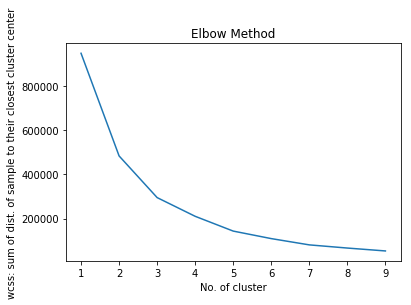

In [36]:
from sklearn.cluster import KMeans
wcss=[]    # within-cluster sums of squares
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )
plt.show()

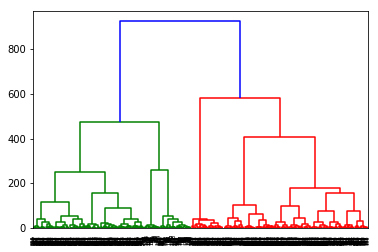

In [37]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(reduced_data,method='ward'))
plt.savefig('dendrogram.png')
figsize=(15, 8)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

#### Apply GMM to the reduced data 
clusterer = GaussianMixture(n_components=10, random_state=1)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)

print(score)

In [39]:
# Apply K-Means to the reduced data and use the results in the next steps:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=18, random_state=1)
clusterer.fit(X3)

# Predict the cluster for each data point
preds = clusterer.predict(X3)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
#sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(X3, preds, random_state=1)
print(score)


0.5601001


### Cluster Visualization

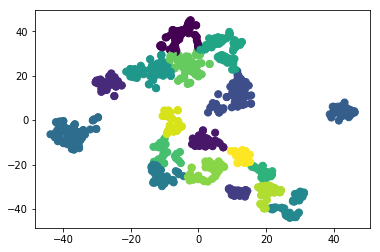

In [41]:
plt.scatter(X3[0], X3[1], c=preds, s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

#display(all_nutr_data_label)
#display(reduced_data)
plt.savefig('pca_components.png')

### Data Recovery


In [ ]:
# Inverse transform the centers
log_centers_scaled = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers_scaled = np.exp(log_centers_scaled) - 1

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers_scaled = pd.DataFrame((true_centers_scaled), columns = micro_data.keys())
true_centers_scaled.index = segments
display(true_centers_scaled)


In [ ]:
#Invserse transform all data
micro_data_reverse = pca.inverse_transform(reduced_data)

micro_data_unscale = scaler.inverse_transform(micro_data_reverse)
micro_data_unscale = pd.DataFrame((micro_data_unscale), columns = micro_data.keys())

# Exponentiate the data
micro_data_unscale_unlog = np.exp(micro_data_unscale) - 1
micro_data_unscale_unlog = pd.DataFrame((micro_data_unscale_unlog), columns = micro_data.keys())
micro_data_final = micro_data_unscale_unlog



display(micro_data_final.head(n = 5))


In [ ]:
print(len(preds))
cluster_id = pd.DataFrame(preds)
#display(cluster_id.head(n = 20))
#df.sum(axis = 1)
#micro_data_scaled_RDA
frames = [NDB_No, all_nutr_data_label, cluster_id, Nutri_index, serving]
frames = [NDB_No, all_nutr_data_label, cluster_id, Nutri_index, serving]
label_cluster_Ni = pd.concat(frames, axis = 1)
data_cluster_Ni = pd.concat()
display(label_cluster_Ni.head(n = 10))
#display(cluster_id.head())

label_cluster_Ni.to_csv(r'test.csv', index=False)

In [ ]:
import seaborn as sns
plt.figure()
ax0=sns.barplot(y=true_centers_scaled.columns.values,x=true_centers_scaled.iloc[0].values)
ax0.set_title('Segment 0')

plt.figure()
ax1=sns.barplot(y=true_centers_scaled.columns.values,x=true_centers_scaled.iloc[1].values)
ax1.set_title('Segment 1')

plt.figure()
ax2=sns.barplot(y=true_centers_scaled.columns.values,x=true_centers_scaled.iloc[2].values)
ax2.set_title('Segment 2')

In [ ]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)